# Лабораторная работа 4

Деревья решений

Выполнил: Клионкин Владислав 6132

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

def print_binary_metrics(labels_test, labels_pred):
    print(f"Precision: {precision_score(labels_test, labels_pred)}")
    print(f"Recall: {recall_score(labels_test, labels_pred)}")
    print(f"F1-score: {f1_score(labels_test, labels_pred)}")
    print(f"Classification report:\n{classification_report(labels_test, labels_pred)}")

def replace_nan_inf(df, columns):
    for c in columns:
        if np.any(np.isnan(df[c])):
            print(c + ' has NaN values')
            df[c].replace(np.nan, 0.0, inplace=True)
        if not np.all(np.isfinite(df[c])):
            print(c + ' has inf values')
            df[c].replace(np.inf, 0.0, inplace=True)
            
def get_cat_and_num_columns(df):
    df_categorical_columns = list(df.select_dtypes(include='object'))
    return df_categorical_columns, [c for c in df.columns if c not in df_categorical_columns]

#https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction 
airline_df = pd.read_csv("./data/airline_passenger_satisfaction.csv").drop('Unnamed: 0', axis=1)
airline_df_categorical_columns, airline_df_numeric_columns = get_cat_and_num_columns(airline_df)
replace_nan_inf(airline_df, airline_df_numeric_columns)
airline_df

arrival_delay_in_minutes has NaN values


,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [2]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

| Признак | Описание | Тип |
|:-------:|:---------|:---:|
|Gender|Пол|Категориальный| 
|customer_type|Лояльность потребителя|Категориальный| 
|age|Возраст|Числовой|  
|type_of_travel|Цель полёта|Категориальный| 
|customer_class|Класс места|Категориальный| 
|flight_distance|Дальность полёта|Числовой|  
|inflight_wifi_service|Качество Wi-fi на борту|Числовой|  
|departure_arrival_time_convenient|Удовлетворённость временем прибытия|Числовой|  
|ease_of_online_booking|Лёгкость бронирования|Числовой|  
|gate_location|Расположение входа|Числовой|  
|food_and_drink|Еда и напитки на борту|Числовой|  
|online_boarding|Онлайн-размещение места|Числовой|  
|seat_comfort|Комфортность места|Числовой|  
|inflight_entertainment|Развлечения на борту|Числовой|  
|onboard_service|Обслуживание при посадке|Числовой|  
|leg_room_service|Пространство для ног|Числовой|  
|baggage_handling|Обращение с багажом|Числовой|  
|checkin_service|Регистрация|Числовой|  
|inflight_service|Обслуживание в полёте|Числовой|  
|cleanliness|Чистота|Числовой|  
|departure_delay_in_minutes|Задержка вылета (мин)|Числовой|  
|arrival_delay_in_minutes|Задержка прибытия (мин)|Числовой|
|satisfaction|Удовлетворённость полётом|Категориальный| 

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [4]:
def cat_to_num_and_scale(df, df_categorical_columns, df_numeric_columns):
    for l in df_categorical_columns:
        df[l] = pd.factorize(df[l])[0]
    for c in df_numeric_columns:
        scaler = StandardScaler()
        df[c] = scaler.fit_transform(np.asarray(df[c]).reshape(-1, 1)).reshape(-1)
        if np.any(np.isnan(df[c])):
            print(c + ' has NaN values')
            df[c].replace(np.nan, 0.0, inplace=True)
        if not np.all(np.isfinite(df[c])):
            print(c + ' has inf values')
            df[c].replace(np.inf, 0.0, inplace=True)
    return df

In [67]:
for l in airline_df_categorical_columns:
    airline_df[l] = pd.factorize(airline_df[l])[0]
airline_df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,34,1,1,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,0,0,23,1,1,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,1,0,17,0,2,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,0,0,14,1,1,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

In [68]:
from sklearn.preprocessing import StandardScaler

for c in airline_df_numeric_columns:
    scaler = StandardScaler()
    airline_df[c] = scaler.fit_transform(np.asarray(airline_df[c]).reshape(-1, 1)).reshape(-1)
    if np.any(np.isnan(airline_df[c])):
        print(c + ' has NaN values')
        airline_df[c].replace(np.nan, 0.0, inplace=True)
    if not np.all(np.isfinite(airline_df[c])):
        print(c + ' has inf values')
        airline_df[c].replace(np.inf, 0.0, inplace=True)

In [36]:
for l in airline_df_numeric_columns:
    if np.any(np.isnan(airline_df[l])):
        print(l + ' still has NaN values')
        break
    if not np.all(np.isfinite(airline_df[l])):
        print(l + ' still has inf values')
        break

arrival_delay_in_minutes still has NaN values


In [69]:
from sklearn.model_selection import train_test_split

y = airline_df['satisfaction']
X = airline_df.drop('satisfaction', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

cl = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
cl.fit(X_train, y_train)
#for c in X_train

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [64]:
y_pred = cl.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print_binary_metrics(y_test, y_pred)

Accuracy: 0.9242377579303973
Precision: 0.9503317657669265
Recall: 0.8711982519340932
F1-score: 0.9090460931722948
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22031
           1       0.95      0.87      0.91     16933

    accuracy                           0.92     38964
   macro avg       0.93      0.92      0.92     38964
weighted avg       0.93      0.92      0.92     38964



1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [16]:
from sklearn.model_selection import train_test_split

y = pd.factorize(airline_df['satisfaction'])[0]
X = airline_df.drop('satisfaction', axis=1)
airline_df_categorical_columns.remove('satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
pipe = Pipeline([('prepare_data', make_column_transformer(
    (OneHotEncoder(), airline_df_categorical_columns),
    (StandardScaler(), airline_df_numeric_columns)
)), ('classify', KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'))])

In [58]:
y_train

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [59]:
pipe = pipe.fit(X_train, y_train)

In [60]:
pipe_predictions = pipe.predict(X_test)

In [64]:
print_binary_metrics(y_test, pipe_predictions)

Precision: 0.9568382735309412
Recall: 0.869308450953759
F1-score: 0.910975647492032
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     22031
           1       0.96      0.87      0.91     16933

    accuracy                           0.93     38964
   macro avg       0.93      0.92      0.92     38964
weighted avg       0.93      0.93      0.93     38964



1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [9]:
y_train

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [17]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('prepare_data', make_column_transformer(
    (OneHotEncoder(), airline_df_categorical_columns),
    (StandardScaler(), airline_df_numeric_columns)
)), ('classify', KNeighborsClassifier(algorithm='kd_tree'))])
search_params = {
    'classify__n_neighbors': list(range(3,16))
}
clf = GridSearchCV(estimator=pipe, param_grid=search_params, cv=3, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

In [21]:
clf.best_params_

{'classify__n_neighbors': 11}

In [26]:
k_neigh_best = clf.best_estimator_
k_neigh_pred = k_neigh_best.predict(X_test)

In [27]:
print_binary_metrics(y_test, k_neigh_pred)

Precision: 0.9479992390132539
Recall: 0.882832339219276
F1-score: 0.9142560088068009
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     22031
           1       0.95      0.88      0.91     16933

    accuracy                           0.93     38964
   macro avg       0.93      0.92      0.93     38964
weighted avg       0.93      0.93      0.93     38964



2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

cur_airline_df = airline_df.copy()
cat_columns, num_columns = get_cat_and_num_columns(cur_airline_df)
y = pd.factorize(cur_airline_df['satisfaction'])[0]
X = cur_airline_df.drop('satisfaction', axis=1)
cat_columns.remove('satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

pipe = Pipeline([('prepare_data', make_column_transformer(
    (OneHotEncoder(), cat_columns),
    (StandardScaler(), num_columns)
)), ('classify', DecisionTreeClassifier(random_state=0))])
pipe = pipe.fit(X_train, y_train)
pipe_predictions = pipe.predict(X_test)
print_binary_metrics(y_test, pipe_predictions)

Precision: 0.9301420754053918
Recall: 0.9367731823237941
F1-score: 0.9334458523314104
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     51360
           1       0.93      0.94      0.93     39556

    accuracy                           0.94     90916
   macro avg       0.94      0.94      0.94     90916
weighted avg       0.94      0.94      0.94     90916



2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

In [14]:
from sklearn.model_selection import GridSearchCV

cur_airline_df = airline_df.copy()
cat_columns, num_columns = get_cat_and_num_columns(cur_airline_df)
cur_airline_df = cat_to_num_and_scale(cur_airline_df, cat_columns, num_columns)
y = cur_airline_df['satisfaction']
X = cur_airline_df.drop('satisfaction', axis=1)
cat_columns.remove('satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
search_params = {
    'max_depth': list(range(2,9)) + [None],
    'max_features': [None, 'auto','sqrt','log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 0.3,0.5]
}
clf = DecisionTreeClassifier()
grid = GridSearchCV(estimator=clf, param_grid=search_params, cv=3, n_jobs=-1)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 0.3, 0.5]})

In [16]:
best_tree = grid.best_estimator_
#best_preds = best_tree.predict(y_test)
best_tree

DecisionTreeClassifier(criterion='entropy')

In [17]:
best_tree.feature_importances_.shape

(22,)

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

<AxesSubplot:>

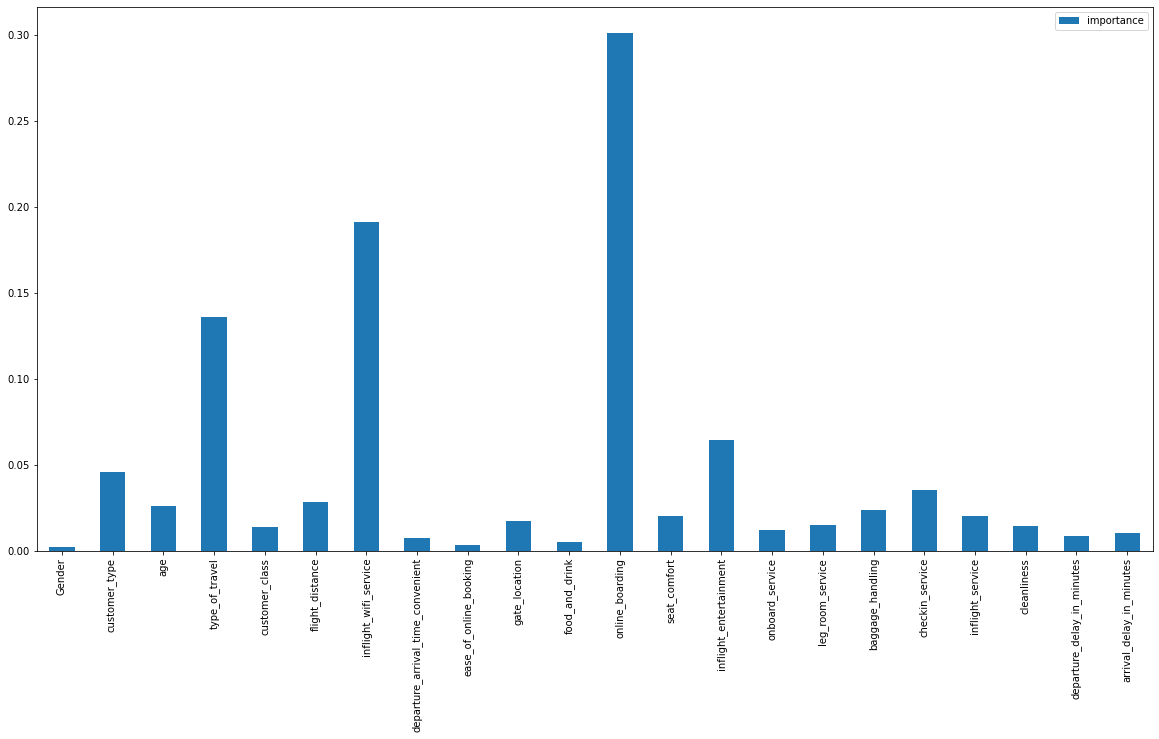

In [27]:
from matplotlib import pyplot as plt

importance_df = pd.DataFrame({"importance": best_tree.feature_importances_}, index=list(X.columns))
importance_df.plot.bar(figsize=(20, 10))

In [26]:
importance_df

,importance
Gender,0.002001
customer_type,0.045674
age,0.025728
type_of_travel,0.135939
customer_class,0.013912
flight_distance,0.028297
inflight_wifi_service,0.190807
departure_arrival_time_convenient,0.007299
ease_of_online_booking,0.003180
gate_location,0.017364


In [24]:
top_3_importance_df = importance_df.sort_values(by='importance', ascending=False).iloc[:3]
top_3_importance_df

,importance
online_boarding,0.301072
inflight_wifi_service,0.190807
type_of_travel,0.135939


3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

cur_airline_df = airline_df.copy()
cat_columns, num_columns = get_cat_and_num_columns(cur_airline_df)
y = pd.factorize(cur_airline_df['satisfaction'])[0]
X = cur_airline_df.drop('satisfaction', axis=1)
cat_columns.remove('satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

pipe = Pipeline([('prepare_data', make_column_transformer(
    (OneHotEncoder(), cat_columns),
    (StandardScaler(), num_columns)
)), ('classify', RandomForestClassifier(random_state=0))])
pipe = pipe.fit(X_train, y_train)
pipe_predictions = pipe.predict(X_test)
print_binary_metrics(y_test, pipe_predictions)

Precision: 0.9667557677834583
Recall: 0.9417534634442309
F1-score: 0.9540908450614043
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     51360
           1       0.97      0.94      0.95     39556

    accuracy                           0.96     90916
   macro avg       0.96      0.96      0.96     90916
weighted avg       0.96      0.96      0.96     90916



3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [5]:
from sklearn.model_selection import GridSearchCV

cur_airline_df = airline_df.copy()
cat_columns, num_columns = get_cat_and_num_columns(cur_airline_df)
cur_airline_df = cat_to_num_and_scale(cur_airline_df, cat_columns, num_columns)
y = cur_airline_df['satisfaction']
X = cur_airline_df.drop('satisfaction', axis=1)
cat_columns.remove('satisfaction')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
search_params = {
    'max_depth': list(range(2,9)) + [None],
    'max_features': [None, 'auto','sqrt','log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 0.3,0.5]
}
clf = RandomForestClassifier()
grid = GridSearchCV(estimator=clf, param_grid=search_params, cv=3, n_jobs=-1)

In [6]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 0.3, 0.5]})

In [7]:
best_forest = grid.best_estimator_
clf_pred = best_forest.predict(X_test)
print_binary_metrics(y_test, clf_pred)

Precision: 0.965240224625624
Recall: 0.9385933865911619
F1-score: 0.9517303255575494
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     51360
           1       0.97      0.94      0.95     39556

    accuracy                           0.96     90916
   macro avg       0.96      0.96      0.96     90916
weighted avg       0.96      0.96      0.96     90916



4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

По результатам лабораторной работы выяснилось, что лучший результат дал RandomForestClassifier со следующими параметрами:
 - criterion: 'gini'
 - max_depth: None
 - max_features: 'sqrt'
 - min_samples_leaf: 1